In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

In [4]:
data_train=pd.read_csv("/kaggle/input/fraud-detection/fraudTrain.csv")
data_test=pd.read_csv("/kaggle/input/fraud-detection/fraudTest.csv")

In [5]:
full=pd.concat([data_train, data_test])

In [6]:
fraud=full[full["is_fraud"]==1]
not_fraud=full[full["is_fraud"]==0]
print(fraud.shape[0])
print(not_fraud.shape[0])

9651
1842743


In [7]:
not_fraud=not_fraud.sample(fraud.shape[0])
data=pd.concat([fraud,not_fraud])

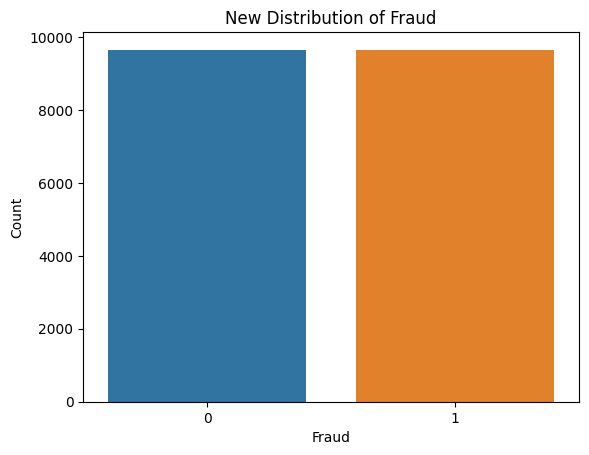

In [8]:
fraud_counts=data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index,y=fraud_counts.values)
plt.title('New Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

In [9]:
data_train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [10]:
data_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [11]:
full

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [12]:
print("Checking Duplicate values:",data_train.duplicated().sum(), data_test.duplicated().sum())
print("Checking Null values:", data_train.isna().sum().sum(), data_test.isna().sum().sum())

Checking Duplicate values: 0 0
Checking Null values: 0 0


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


# data preprocessing for Training Data
train_data = data_train[['gender', "category", "amt", "city", "job", "is_fraud"]]

train_data.loc[:, 'category'] = le.fit_transform(train_data["category"])
train_data.loc[:, 'city'] = le.fit_transform(train_data["city"])
train_data.loc[:, 'job'] = le.fit_transform(train_data["job"])
train_data.loc[:, 'gender'] = train_data["gender"].map({'M': 0, 'F': 1})

# data preprocessing for Testing Data
test_data = data_test[['gender',"category","amt","city", "job","is_fraud"]]

test_data.loc[:, 'category'] = le.fit_transform(test_data["category"])
test_data.loc[:, 'city'] = le.fit_transform(test_data["city"])
test_data.loc[:, 'job'] = le.fit_transform(test_data["job"])
test_data.loc[:, 'gender'] = test_data["gender"].map({'M': 0, 'F': 1})

In [14]:
train_data.head(10)

,gender,category,amt,city,job,is_fraud
0,1,8,4.97,526,370,0
1,1,4,107.23,612,428,0
2,0,0,220.11,468,307,0
3,0,2,45.00,84,328,0
4,0,9,41.96,216,116,0
5,1,2,94.63,223,479,0
6,1,3,44.54,351,29,0
7,0,2,71.65,236,127,0
8,1,9,4.27,474,375,0
9,1,4,198.39,149,329,0


In [15]:
test_data.head(10)

,gender,category,amt,city,job,is_fraud
0,0,10,2.86,157,275,0
1,1,10,29.84,16,392,0
2,1,5,41.28,61,259,0
3,0,9,60.05,764,407,0
4,0,13,3.19,247,196,0
5,1,7,19.55,90,361,0
6,1,5,133.93,117,455,0
7,1,10,10.37,725,124,0
8,0,12,4.37,503,13,0
9,1,1,66.54,624,41,0


In [16]:
X_train = train_data[['gender', "category", "amt", "city", "job"]]
Y_train = train_data["is_fraud"]

X_test = test_data[['gender', "category", "amt", "city", "job"]]
Y_test = test_data["is_fraud"]

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)

# Predict on test data
logistic_preds = logistic_model.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(Y_test, logistic_preds))
print("Logistic Regression Report:\n", classification_report(Y_test, logistic_preds))


Logistic Regression Accuracy: 0.9955013235106231
Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [18]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, Y_train)

# Predict on test data
decision_tree_preds = decision_tree_model.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(Y_test, decision_tree_preds))
print("Decision Tree Report:\n", classification_report(Y_test, decision_tree_preds))


Decision Tree Accuracy: 0.9958846107475181
Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.47      0.59      0.53      2145

    accuracy                           1.00    555719
   macro avg       0.74      0.79      0.76    555719
weighted avg       1.00      1.00      1.00    555719



In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Initialize and train the Random Forest model
# #random_forest_model = RandomForestClassifier(random_state=42)
# random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
# random_forest_model.fit(X_train, Y_train)

# # Predict on test data
# random_forest_preds = random_forest_model.predict(X_test)

# # Evaluation
# print("Random Forest Accuracy:", accuracy_score(Y_test, random_forest_preds))
# # print("Random Forest Report:\n", classification_report(Y_test, random_forest_preds))

Random forest method is taking large amout of time for train so we can leave for now.as other model acuracy is good info to predict the values.

In [21]:
import pandas as pd

# Sample new data (your test_data)
new_data = pd.DataFrame({
    'gender': [0, 1, 1, 0, 0, 1, 1, 1, 0, 1],
    'category': [10, 10, 5, 9, 13, 7, 5, 10, 12, 1],
    'amt': [2.86, 29.84, 41.28, 60.05, 3.19, 19.55, 133.93, 10.37, 4.37, 66.54],
    'city': [157, 16, 61, 764, 247, 90, 117, 725, 503, 624],
    'job': [275, 392, 259, 407, 196, 361, 455, 124, 13, 41]
})

# Make predictions using the trained model (e.g., Random Forest)
predictions = random_forest_model.predict(new_data)

# Convert numeric predictions (0 and 1) to readable format ('Not Fraud' and 'Fraud')
prediction_labels = ['Fraud' if pred == 1 else 'Not Fraud' for pred in predictions]

# Create a new dataframe with predictions
result_df = new_data.copy()  # Copy the original data
result_df['Prediction'] = prediction_labels  # Add prediction column

# Display the result
print(result_df)


   gender  category     amt  city  job Prediction
0       0        10    2.86   157  275  Not Fraud
1       1        10   29.84    16  392  Not Fraud
2       1         5   41.28    61  259  Not Fraud
3       0         9   60.05   764  407  Not Fraud
4       0        13    3.19   247  196  Not Fraud
5       1         7   19.55    90  361  Not Fraud
6       1         5  133.93   117  455  Not Fraud
7       1        10   10.37   725  124  Not Fraud
8       0        12    4.37   503   13  Not Fraud
9       1         1   66.54   624   41  Not Fraud


In [22]:
import pandas as pd

# Create sample data that might be fraudulent
fraud_data = pd.DataFrame({
    'gender': [1, 0, 1, 0, 1],
    'category': [5, 7, 1, 9, 13],
    'amt': [5000, 10000, 2000, 15000, 8000],
    'city': [764, 247, 624, 16, 90],
    'job': [392, 407, 275, 259, 455]
})

# Predict using the trained Random Forest model
fraud_predictions = random_forest_model.predict(fraud_data)

# Convert numeric predictions to 'Fraud' or 'Not Fraud'
fraud_labels = ['Fraud' if pred == 1 else 'Not Fraud' for pred in fraud_predictions]

# Add the predictions to the dataframe
fraud_data['Prediction'] = fraud_labels

# Display the resulting dataframe with predictions
print(fraud_data)


   gender  category    amt  city  job Prediction
0       1         5   5000   764  392  Not Fraud
1       0         7  10000   247  407  Not Fraud
2       1         1   2000   624  275  Not Fraud
3       0         9  15000    16  259  Not Fraud
4       1        13   8000    90  455  Not Fraud


as we can see in the starting of the code
* fraud=full[full["is_fraud"]==1]
* not_fraud=full[full["is_fraud"]==0]
* print(fraud.shape[0])
* print(not_fraud.shape[0])
* 9651
* 1842743


**there is less no outcomes regarding fraud in data as so the model is predicting not fraud in most of the cases.
**
